# Multi-Classification Modeling with top 5 beacons with DNN
## Index
- Load data & import modules
- Preprocessing & split
- DNN modeling
- Ploting 
- Confusion Matrix



# Load data & import moduels
- tensorflow version 2.9.1 required

In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd drive/MyDrive/BEST/ios_clf_direction

/content/drive/MyDrive/BEST/ios_clf_direction


In [ ]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.8.2


# Preprocessing & split
- Concat all the data
- split into 7:3

In [ ]:
datas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'ios_clf_data_5_concated{data[0]}0{index}.csv'))
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'ios_clf_data_5_concated{data[0]}{index}.csv'))
    datas.append(no_supervised)

In [ ]:
result = pd.concat(datas)

In [ ]:
result.loc[result['location'] == 'A011', 'location'] = 'A11'
result.loc[result['location'] == 'A010', 'location'] = 'A10'

In [ ]:
result.drop('Unnamed: 0', axis=1, inplace=True)

# DNN modeling
- Multi-Classification with Top 5 beacons


# Hyperparameter Tuning
- Normalization : Weight Normalization
- learning rate : [0.01, 0.001, 0.0001]
- loss: categorical_crossentropy
- Optimaization: Adam
- epoch: 50
- output layer: 31
- activation: Relu
- activation: Softmax

# Result
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.

- loss: 0.2660
- accuracy: 0.9180 
- precision: 0.9209 
- recall: 0.9136 
- f1_score: 0.9148 
- 345ms/epoch - 2ms/step


In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result.iloc[:, 1:])
y = le.fit_transform(np.array(result['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
result

,location,001,002,003,004,005,006,007,008,009,...,013,014,015,016,017,018,019,020,021,022
0,S01,-200.0,-71.244017,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0,...,-77.959780,-63.000000,-200.00000,-200.000000,-200.00000,-200.000000,-200.000000,-55.289627,-200.0,-200.0
1,S01,-200.0,-70.000000,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0,...,-74.000000,-63.000000,-200.00000,-200.000000,-200.00000,-200.000000,-200.000000,-52.000000,-200.0,-200.0
2,S01,-200.0,-71.501495,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0,...,-74.500496,-67.513870,-200.00000,-200.000000,-200.00000,-200.000000,-200.000000,-50.999000,-200.0,-200.0
3,S01,-200.0,-72.337105,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0,...,-75.001990,-63.334442,-200.00000,-200.000000,-200.00000,-200.000000,-200.000000,-50.330452,-200.0,-200.0
4,S01,-200.0,-72.252240,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0,...,-76.008470,-63.753740,-200.00000,-200.000000,-200.00000,-200.000000,-200.000000,-49.492027,-200.0,-200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,U01,-200.0,-200.000000,-200.0,-200.0,-200.0,-200.0,-81.896020,-200.0,-200.0,...,-200.000000,-200.000000,-200.00000,-71.862980,-66.38983,-66.030690,-77.016140,-200.000000,-200.0,-200.0
977,U01,-200.0,-200.000000,-200.0,-200.0,-200.0,-200.0,-81.813095,-200.0,-200.0,...,-200.000000,-200.000000,-200.00000,-71.912710,-66.54772,-65.941880,-80.932260,-200.000000,-200.0,-200.0
978,U01,-200.0,-200.000000,-200.0,-200.0,-200.0,-200.0,-81.777534,-200.0,-200.0,...,-200.000000,-200.000000,-200.00000,-74.970460,-66.69871,-66.119360,-77.015434,-200.000000,-200.0,-200.0
979,U01,-200.0,-200.000000,-200.0,-200.0,-200.0,-200.0,-200.000000,-200.0,-200.0,...,-200.000000,-200.000000,-81.00269,-71.960266,-67.10002,-66.332820,-76.971020,-200.000000,-200.0,-200.0


In [ ]:
X = np.asarray(X).astype(np.float32)

In [ ]:
X[0]

array([-200.  ,  -71.24, -200.  , -200.  , -200.  , -200.  , -200.  ,
       -200.  , -200.  , -200.  ,  -68.  , -200.  ,  -77.96,  -63.  ,
       -200.  , -200.  , -200.  , -200.  , -200.  ,  -55.29, -200.  ,
       -200.  ], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,shuffle=True)

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
!pip install IPython
import IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
checkpoint_path = "training_3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
tf.random.set_seed(42)
initializer = tf.keras.initializers.HeNormal()

def model_builder(hp):
   model = keras.Sequential()
    
   # Dense layer unit number 32~256
   hp_unit = hp.Int('units', min_value=32, max_value=256, step=32)
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(keras.layers.Dense(31, activation = 'softmax'))

   # (learning rate) = [0.01, 0.001, 0.0001]
   hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

   opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
   loss = tf.keras.losses.categorical_crossentropy
   model.compile(optimizer= opt, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=31, average='macro', threshold=0.5)])


   return model

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 135 kB 5.3 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30,
                     factor=3,
                     hyperband_iterations=2,
                     directory = 'hi',
                     project_name = 'ios_clf_7')

INFO:tensorflow:Reloading Oracle from existing project hi/ios_clf_7/oracle.json


INFO:tensorflow:Reloading Oracle from existing project hi/ios_clf_7/oracle.json


INFO:tensorflow:Reloading Tuner from hi/ios_clf_7/tuner0.json


INFO:tensorflow:Reloading Tuner from hi/ios_clf_7/tuner0.json


In [ ]:
tuner.search(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
model_based_tuner = tuner.hypermodel.build(best_hps)
history = model_based_tuner.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_train,y_train), callbacks = [ClearTrainingOutput()])

Epoch 1/50
674/674 [==============================] - 22s 20ms/step - loss: 0.8124 - accuracy: 0.6790 - precision_1: 0.7410 - recall_1: 0.5999 - f1_score: 0.6430 - val_loss: 0.6402 - val_accuracy: 0.6912 - val_precision_1: 0.7389 - val_recall_1: 0.6648 - val_f1_score: 0.6438
Epoch 2/50
674/674 [==============================] - 6s 9ms/step - loss: 0.5977 - accuracy: 0.7483 - precision_1: 0.7851 - recall_1: 0.6984 - f1_score: 0.7243 - val_loss: 0.5045 - val_accuracy: 0.7993 - val_precision_1: 0.8206 - val_recall_1: 0.7149 - val_f1_score: 0.7187
Epoch 3/50
674/674 [==============================] - 7s 11ms/step - loss: 0.5010 - accuracy: 0.7902 - precision_1: 0.8117 - recall_1: 0.7618 - f1_score: 0.7800 - val_loss: 0.4614 - val_accuracy: 0.8122 - val_precision_1: 0.8262 - val_recall_1: 0.7966 - val_f1_score: 0.7952
Epoch 4/50
674/674 [==============================] - 4s 6ms/step - loss: 0.4638 - accuracy: 0.8075 - precision_1: 0.8227 - recall_1: 0.7864 - f1_score: 0.8003 - val_loss: 0.4

In [ ]:
model_based_tuner_dict = history.history
model_based_tuner_dict.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_f1_score'])

In [ ]:
results = model_based_tuner.evaluate(X_test,  y_test, verbose=2)

289/289 - 1s - loss: 0.2544 - accuracy: 0.8998 - precision_1: 0.9074 - recall_1: 0.8927 - f1_score: 0.8974 - 516ms/epoch - 2ms/step


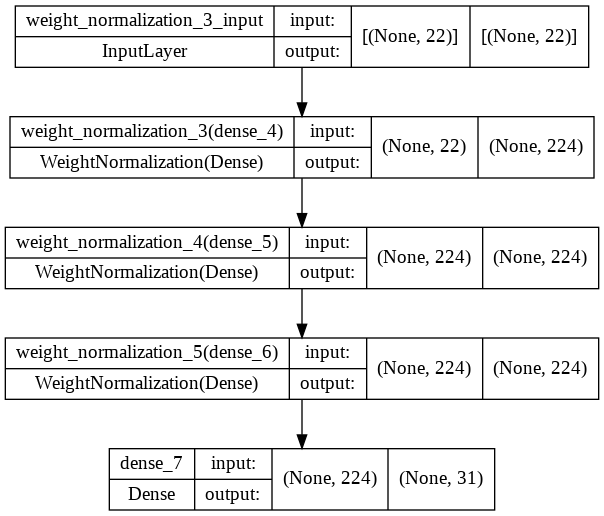

In [ ]:
keras.utils.plot_model(model_based_tuner, "beacon5_DNN.png", show_shapes=True)

# Ploting 

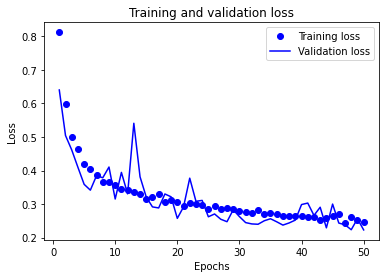

In [ ]:
acc = model_based_tuner_dict['accuracy']
val_acc = model_based_tuner_dict['val_accuracy']
loss = model_based_tuner_dict['loss']
val_loss = model_based_tuner_dict['val_loss']
recall = model_based_tuner_dict['recall_1']
val_recall = model_based_tuner_dict['val_recall_1']
f1_score = model_based_tuner_dict['f1_score']
val_f1_score = model_based_tuner_dict['val_f1_score']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

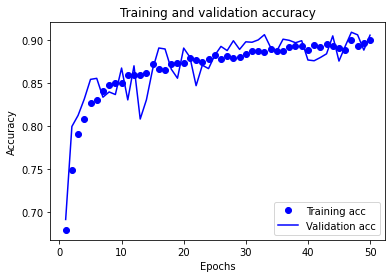

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

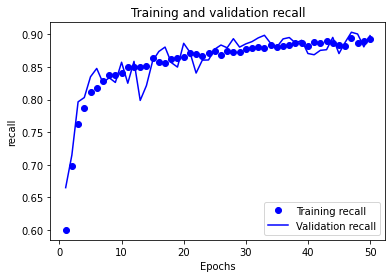

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, recall, 'bo', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()

plt.show()

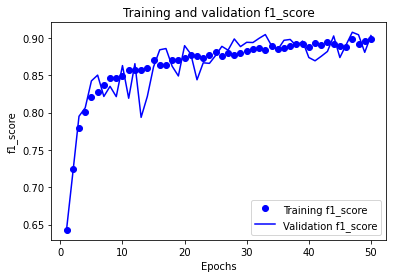

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, f1_score, 'bo', label='Training f1_score')
plt.plot(epochs, val_f1_score, 'b', label='Validation f1_score')
plt.title('Training and validation f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()

plt.show()

# Confusion Matrix

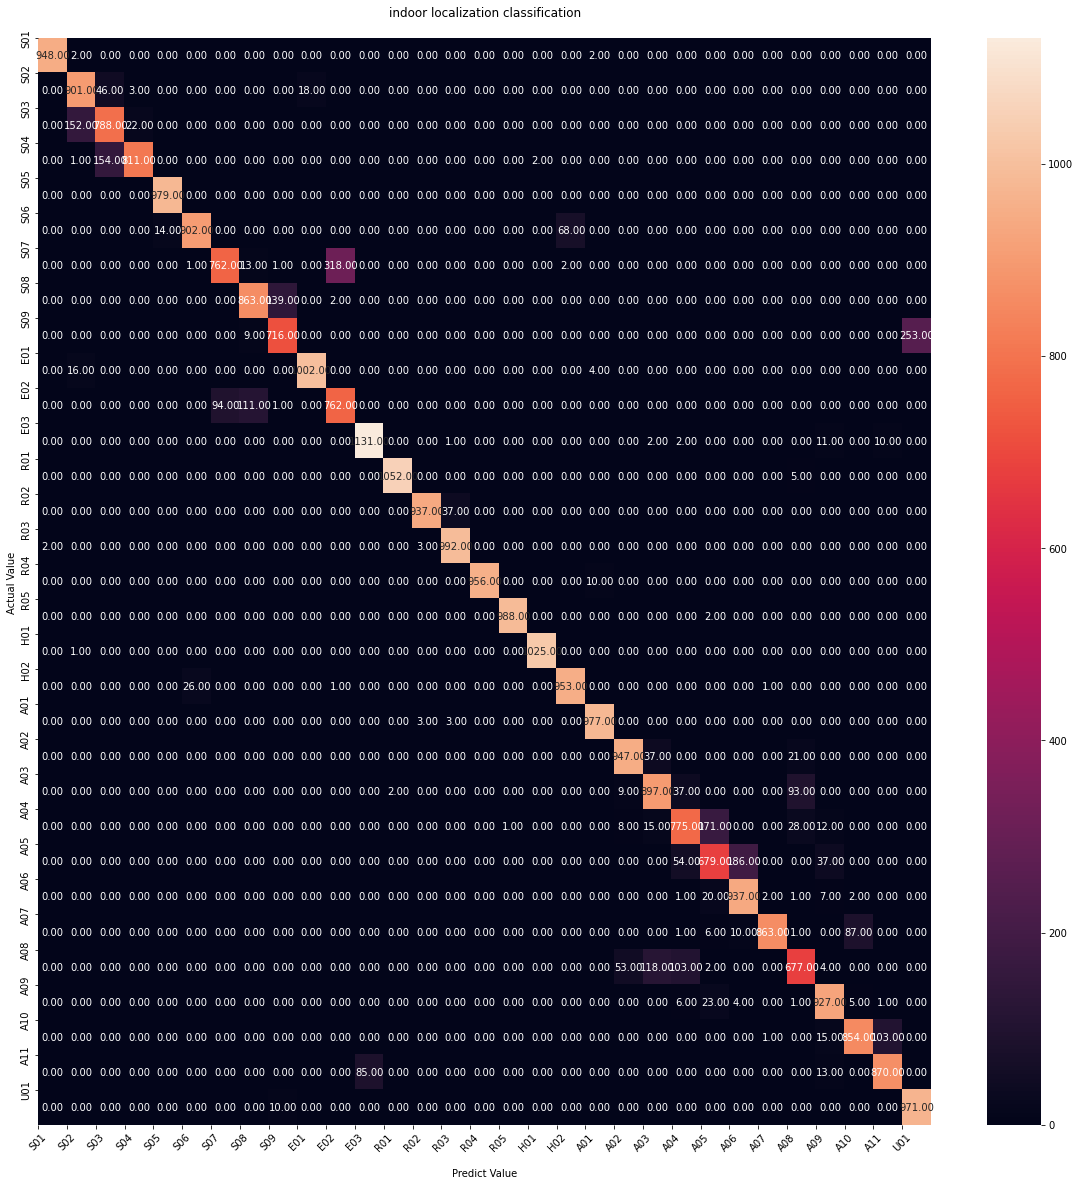

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ['S01','S02', 'S03','S04','S05','S06','S07','S08','S09', 'E01','E02','E03', 'R01', 'R02', 'R03', 'R04',
           'R05', 'H01', 'H02', 'A01', 'A02', 'A03','A04','A05','A06','A07','A08','A09','A10', 'A11', 'U01']

y_test_arg=np.argmax(y,axis=1)
y_test = le.inverse_transform(y_test_arg)
Y_pred = np.argmax(model_based_tuner.predict(X),axis=1)
Y_pred = le.inverse_transform(Y_pred)


tick_marks = np.arange(len(labels))
cf_matrix = confusion_matrix(y_test, Y_pred, labels = labels)
cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True, fmt='.2f')
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model_based_tuner)
# tflite_model = converter.convert()

# # Save the model.
# with open('ios_beacon5concat.tflite', 'wb') as f:
#   f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpeiavek6y/assets


INFO:tensorflow:Assets written to: /tmp/tmpeiavek6y/assets


#Test_data

In [ ]:
testdatas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

#Filtered_Test_U01

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}0{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}0{index}')
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}{index}')
    testdatas.append(no_supervised)


def tominus200(x) :
  if float(x) <= -90 :
    return -200
  return float(x)

beacons = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021', '022']
for data in testdatas:
  for beacon in beacons:
    data[beacon] = data[beacon].apply(tominus200)

In [ ]:
for data in testdatas:
  for row_index in range(len(data)):
    if row_index % 2 == 1:
      for col_index in range(1, len(data.columns)):
        if data.iloc[row_index - 1, col_index] > data.iloc[row_index, col_index]:
          data.iloc[row_index, col_index] = data.iloc[row_index - 1, col_index]


In [ ]:
# 상위 5개를 통해서 classification 하기
for data in testdatas:
  for row_index in range(len(data)):
    column_idx = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
    a = sorted(data.loc[row_index].tolist()[1:])
    b = list(a)[-5:]
    isMax = [0]
    for i in range(len(data.columns)):
      for num in b:
        if data.loc[row_index][i] == num:
          isMax.append(i)

    remove_set = set(isMax)
    column_idx = [i for i in column_idx if i not in remove_set]
    data.iloc[[row_index], column_idx] = [-200 for i in range(len(column_idx))]
  

In [ ]:
for index in range(len(testdatas)):
  testdatas[index] = testdatas[index].iloc[1::2,:]

In [ ]:
for index in range(len(testdatas)):
  testdatas[index].reset_index(inplace=True)

In [ ]:
for index in range(len(testdatas)):
  testdatas[index].drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
result_test = pd.concat(testdatas)

In [ ]:
result_test.reset_index(inplace=True)
result_test.drop('index', axis=1, inplace=True)

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result_test.iloc[:, 1:])
y = le.fit_transform(np.array(result_test['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X[0]

array([-200.,  -70., -200., -200., -200., -200., -200., -200., -200.,
        -76.,  -79., -200., -200.,  -62., -200., -200., -200., -200.,
       -200.,  -53., -200., -200.])

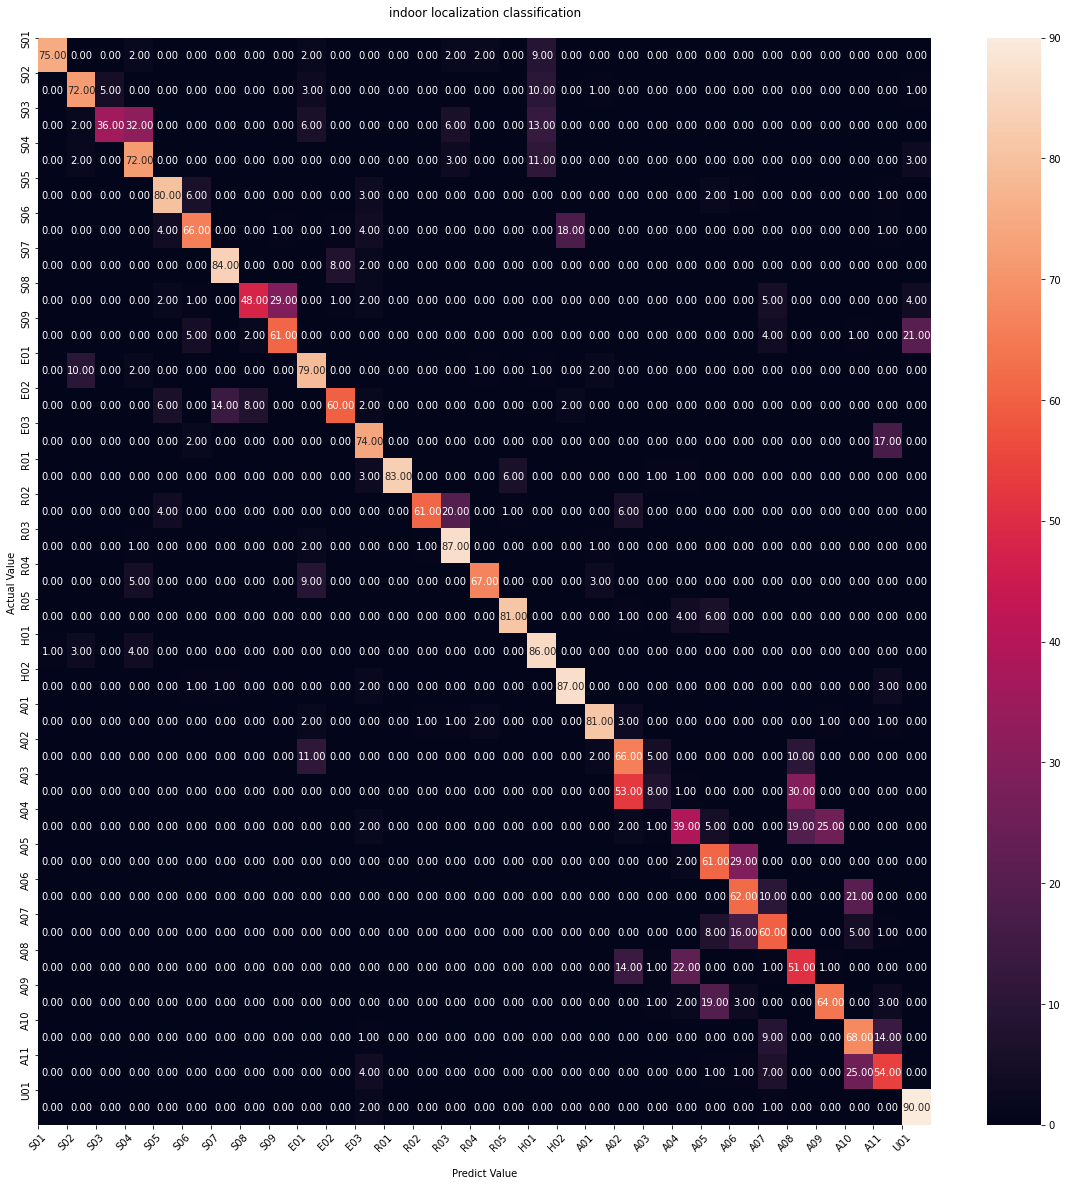

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ['S01','S02', 'S03','S04','S05','S06','S07','S08','S09', 'E01','E02','E03', 'R01', 'R02', 'R03', 'R04',
           'R05', 'H01', 'H02', 'A01', 'A02', 'A03','A04','A05','A06','A07','A08','A09','A10', 'A11', 'U01']
y_test_arg2=np.argmax(y,axis=1)
y_test2 = le.inverse_transform(y_test_arg)
Y_pred2 = np.argmax(model_based_tuner.predict(X),axis=1)
Y_pred2 = le.inverse_transform(Y_pred2)

# print(Y_pred)
# print('Confusion Matrix')
tick_marks = np.arange(len(labels))
cf_matrix = confusion_matrix(y_test2, Y_pred2, labels = labels)
cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True, fmt='.2f')
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("f1score: ", f1_score(y_true=y_test_arg, y_pred=Y_pred, average='weighted'))
print("accuracy: ", accuracy_score(y_true=y_test_arg, y_pred=Y_pred))
print("precision: ", precision_score(y_true=y_test_arg, y_pred=Y_pred, average='weighted'))
print("recall: ", recall_score(y_true=y_test_arg, y_pred=Y_pred,  average='weighted'))

f1score:  0.7126113198693194
accuracy:  0.7200698080279232
precision:  0.7350554368616883
recall:  0.7200698080279232


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test2, Y_pred2, target_names=labels)

In [ ]:
print(report)

              precision    recall  f1-score   support

         S01       0.90      0.88      0.89        92
         S02       0.46      0.70      0.55        94
         S03       0.47      0.09      0.15        92
         S04       0.55      0.42      0.48        93
         S05       0.60      0.66      0.63        92
         S06       0.55      0.67      0.60        93
         S07       0.62      0.67      0.64        90
         S08       0.46      0.57      0.51        90
         S09       0.70      0.70      0.70        92
         E01       0.57      0.74      0.64        92
         E02       0.57      0.59      0.58        92
         E03       0.69      0.83      0.76        95
         R01       0.86      0.65      0.74        92
         R02       0.73      0.80      0.76        93
         R03       0.66      0.91      0.77        94
         R04       0.81      0.93      0.87        94
         R05       1.00      0.88      0.94        94
         H01       0.97    

In [ ]:
model_based_tuner.save('ios_beacon_DNN_5')

INFO:tensorflow:Assets written to: ios_beacon_DNN_5/assets


INFO:tensorflow:Assets written to: ios_beacon_DNN_5/assets
